<a href="https://colab.research.google.com/github/MateusRamos10/Titanic_Kaggle/blob/main/Desafio_Titanic_I2A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Titanic - *Kaggle*

#### **Desafio I2A2**
*autor [Mateus Ramos](https://www.linkedin.com/in/mateus-simoes-ramos/)*

---

<br>

Este *notebook* tem como objetivo analisar os dados referentes ao acidente do Titanic, passando das transformações dos dados até a análise.

Essa base de dados tem como objetivo o princípio de ciência de dados usando modelos preditivos de forma didática e introdutória, esse proojeto é considerado o início desse aprendizado.

Aqui, neste notebook, executarei uma análise exploratória do conjunto de dados para definir quais insights podem ser extraídos a partir de dados brutos.

<br>
<br>

<p align="center">
<img alt="Airbnb logo" width="60%" src="https://github.com/MateusRamos10/Titanic_Kaggle/assets/43836795/b345697c-ae17-4203-9791-317b2a79fc51">
</p>


### Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Kaggle](https://www.kaggle.com/competitions/titanic).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `Train.csv` - Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**Importando arquivo direto do Kaggle**

In [ ]:
from google.colab import files
files.upload()

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                                  3KB  2024-03-02 18:50:30           9989        185  0.9411765        
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          19490        339  1.0              
julianoorlandi/spotify-top-songs-and-audio-features  Spotify Top Songs and Audio Features               526KB  2024-03-18 12:49:50           1378         27  1.0              
bhavikjikadara/student-study-performance             Student Study Performance                            9KB  2024-03-0

In [5]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


**Importando arquivo localmente**

In [7]:
# importar o arquivo train.csv para um DataFrame
train = pd.read_csv ("train.csv")
test = pd.read_csv ("test.csv")

### 1. Business Understandig

Em 1901, o Titanic foi um navio desenvolvido para ser o mais **luxuoso** de sua época, com 269 metros de comprimento e 53 metros de altura, tinha capacidade de **2435 passageiros** e 892 tripulantes.

Atualmente o maior navio de cruzeiro tem capacidade para 2350 passageiros [(Icon of the Seas)](https://www.melhoresdestinos.com.br/maiores-navios-cruzeiro.html). A fim de comparação, o Titanic hoje em dia seria um navio de destaque.

Em sua primeira viagem inaugural de Southampton(UK) a Nova Iorque o Titanic partiu e 4 dias depois se chocou com um iceberg, com mais de 2200 passageiros.

<p align="center">
<img alt="Airbnb logo" width="35%" src="https://github.com/MateusRamos10/Titanic_Kaggle/assets/43836795/20e3659c-5794-4087-bb35-c840a5e07ec8">
</p>

### 2. Data Understanding

**Dicionário das variáveis**

* PassengerID - Id da base de dados
* Survived - Não sobrevivente = 0, Sobrevivente =  1
* Pclass - Passagem: 1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe
* Name - Nome do passageiro
* Sex - Sexo
* Age - Idade em anos
* SibSp - Número de irmãos/cônjuges a bordo do Titanic
* Parch - Número de pais/filhos a bordo do Titanic
* Ticket - Número da passagem
* Fare - Tarifa do passageiro
* Cabin - Número da cabine
* Embarked - Porto de Embarque: C = Cherbourg, Q = Queenstown, S = Southampton

Antes de iniciar qualquer análise, vamos verificar a "cara" do nosso *dataset*, analisando as 5 primeiras entradas.

In [8]:
# mostrar as 5 primeiras entradas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(train.shape[0])) # Registros
print("Variáveis:\t {}".format(train.shape[1])) # Colunas
print("\n")

# verificar qual o tipo de dado da coluna
display(train.dtypes)

Entradas:	 891
Variáveis:	 12




PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Qual a porcentagem de valores ausentes no *dataset*?**

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

**Qual o tipo de distribuição das variáveis?**

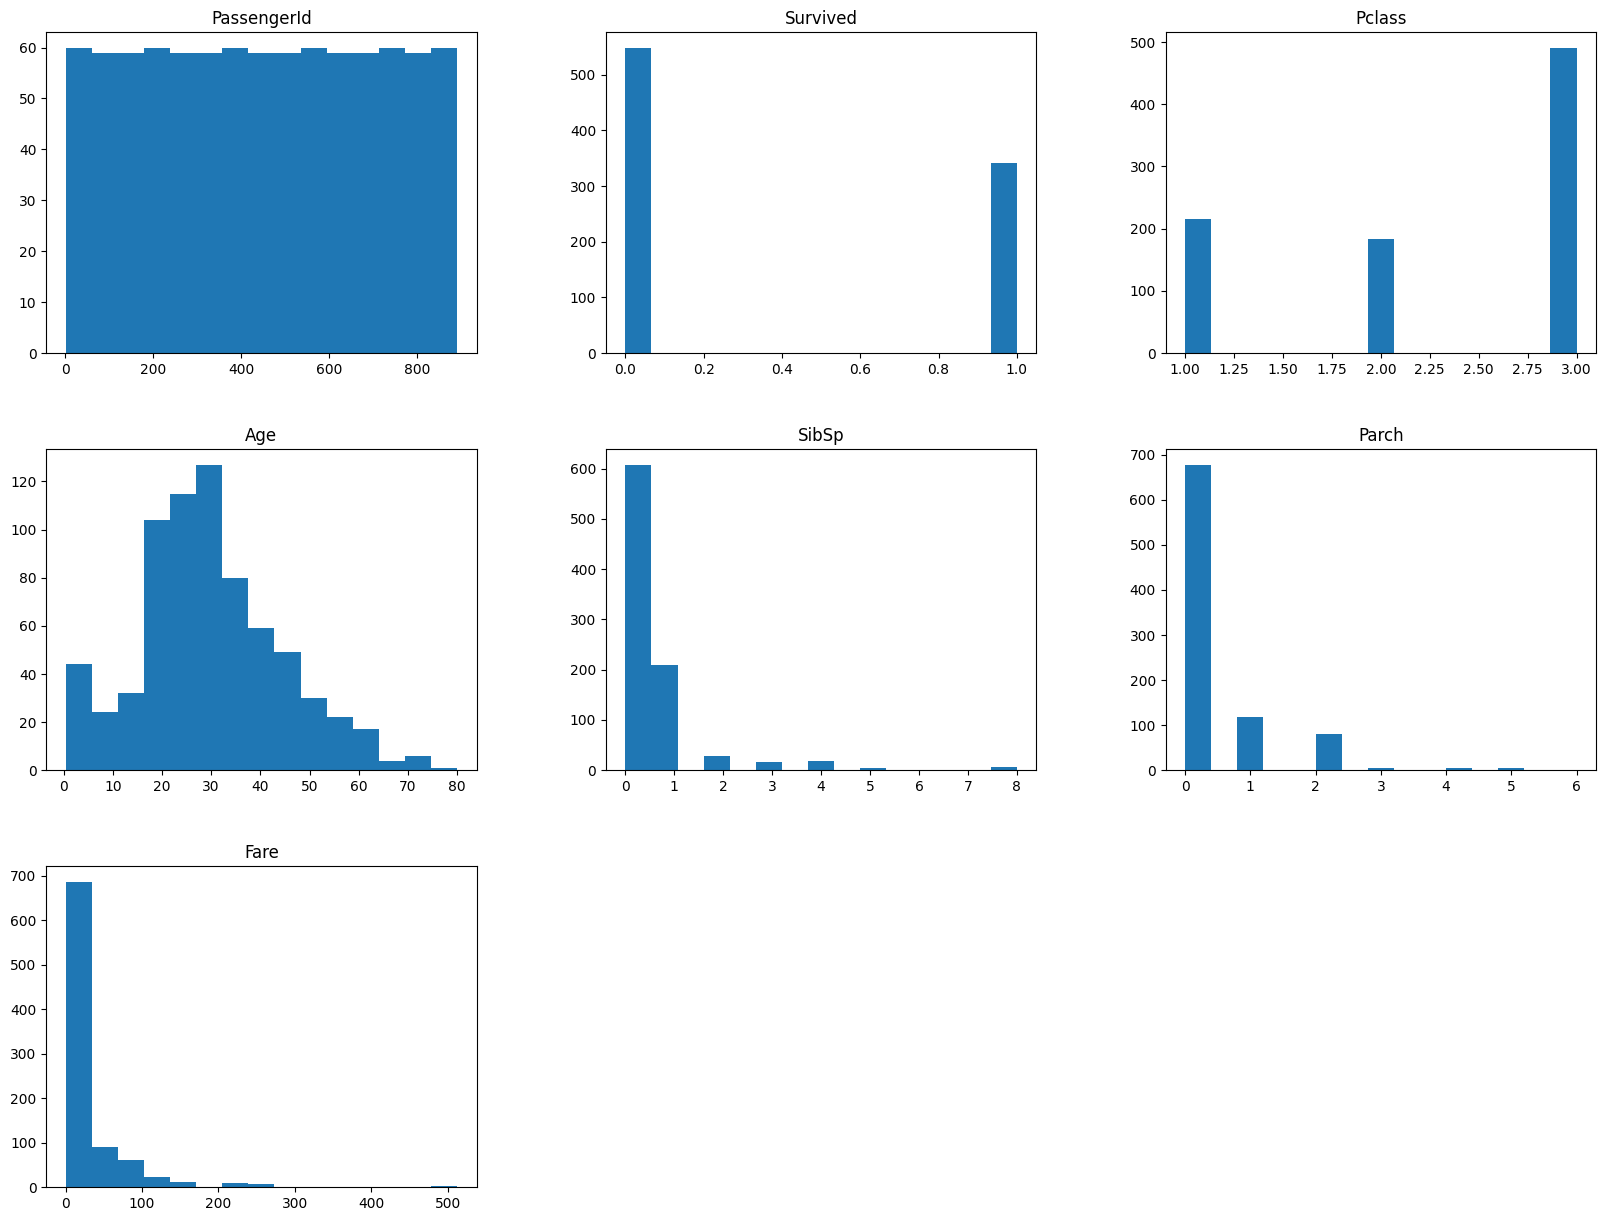

In [11]:
# plotar o histograma das variáveis numéricas
train.hist(bins=15, figsize=(20,15), grid=False);

**Há outliers presentes?**

In [12]:
# ver o resumo estatístico das variáveis numéricas
train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Boxplot para variável Age**

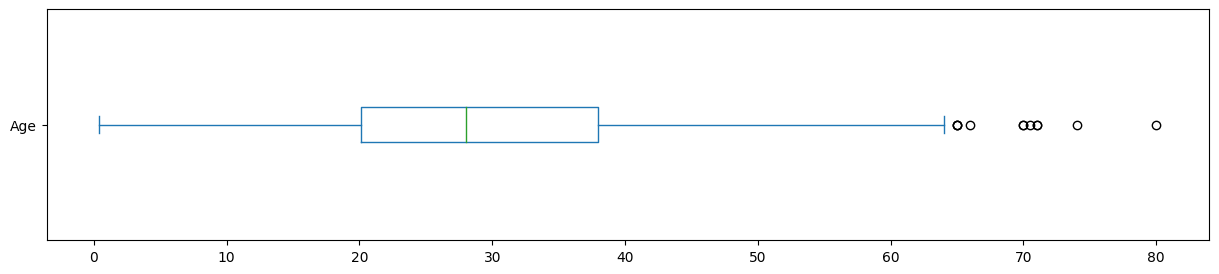

Age: >55
40 entradas
4.4893%


In [13]:
# Age
train.Age.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 55 anos para Age
print("Age: >55")
print("{} entradas".format(len(train[train.Age > 55])))
print("{:.4f}%".format((len(train[train.Age > 55]) / train.shape[0])*100))

**Boxplot para variável Fare**

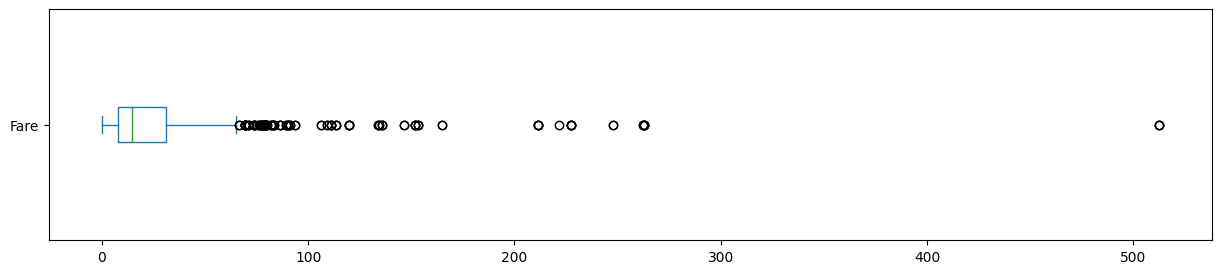

Fare: >200
20 entradas
2.2447%


In [14]:
# Fare
train.Fare.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 200 libras para Fare
print("Fare: >200")
print("{} entradas".format(len(train[train.Fare > 200])))
print("{:.4f}%".format((len(train[train.Fare > 200]) / train.shape[0])*100))

**Qual a correlação existente entre as variáveis**

In [15]:
valores_distintos = train['Sex'].unique()

# Exibindo os valores distintos
print(valores_distintos)

train['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

# Exibindo os valores distintos após a substituição
valores_distintos = train['Sex'].unique()
print(valores_distintos)

['male' 'female']
[0 1]


*LabelEncoder do sklearn transforma dados categóricos em numéricos*

In [16]:
# criar matriz de correlação
corr = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr()

# mostrar a matriz de correlação
display(corr)

<ipython-input-16-9c6bef86b370>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


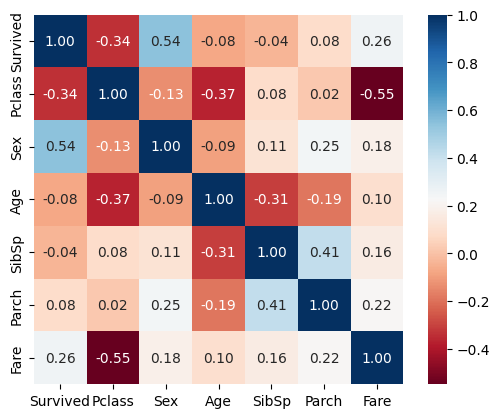

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### 3. Data Preparation

**Histogramas sem *outliers***

Já que identificamos os *outliers* nas variáveis `Age` e `Fare`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

Registros:	 891
Registros:	 832


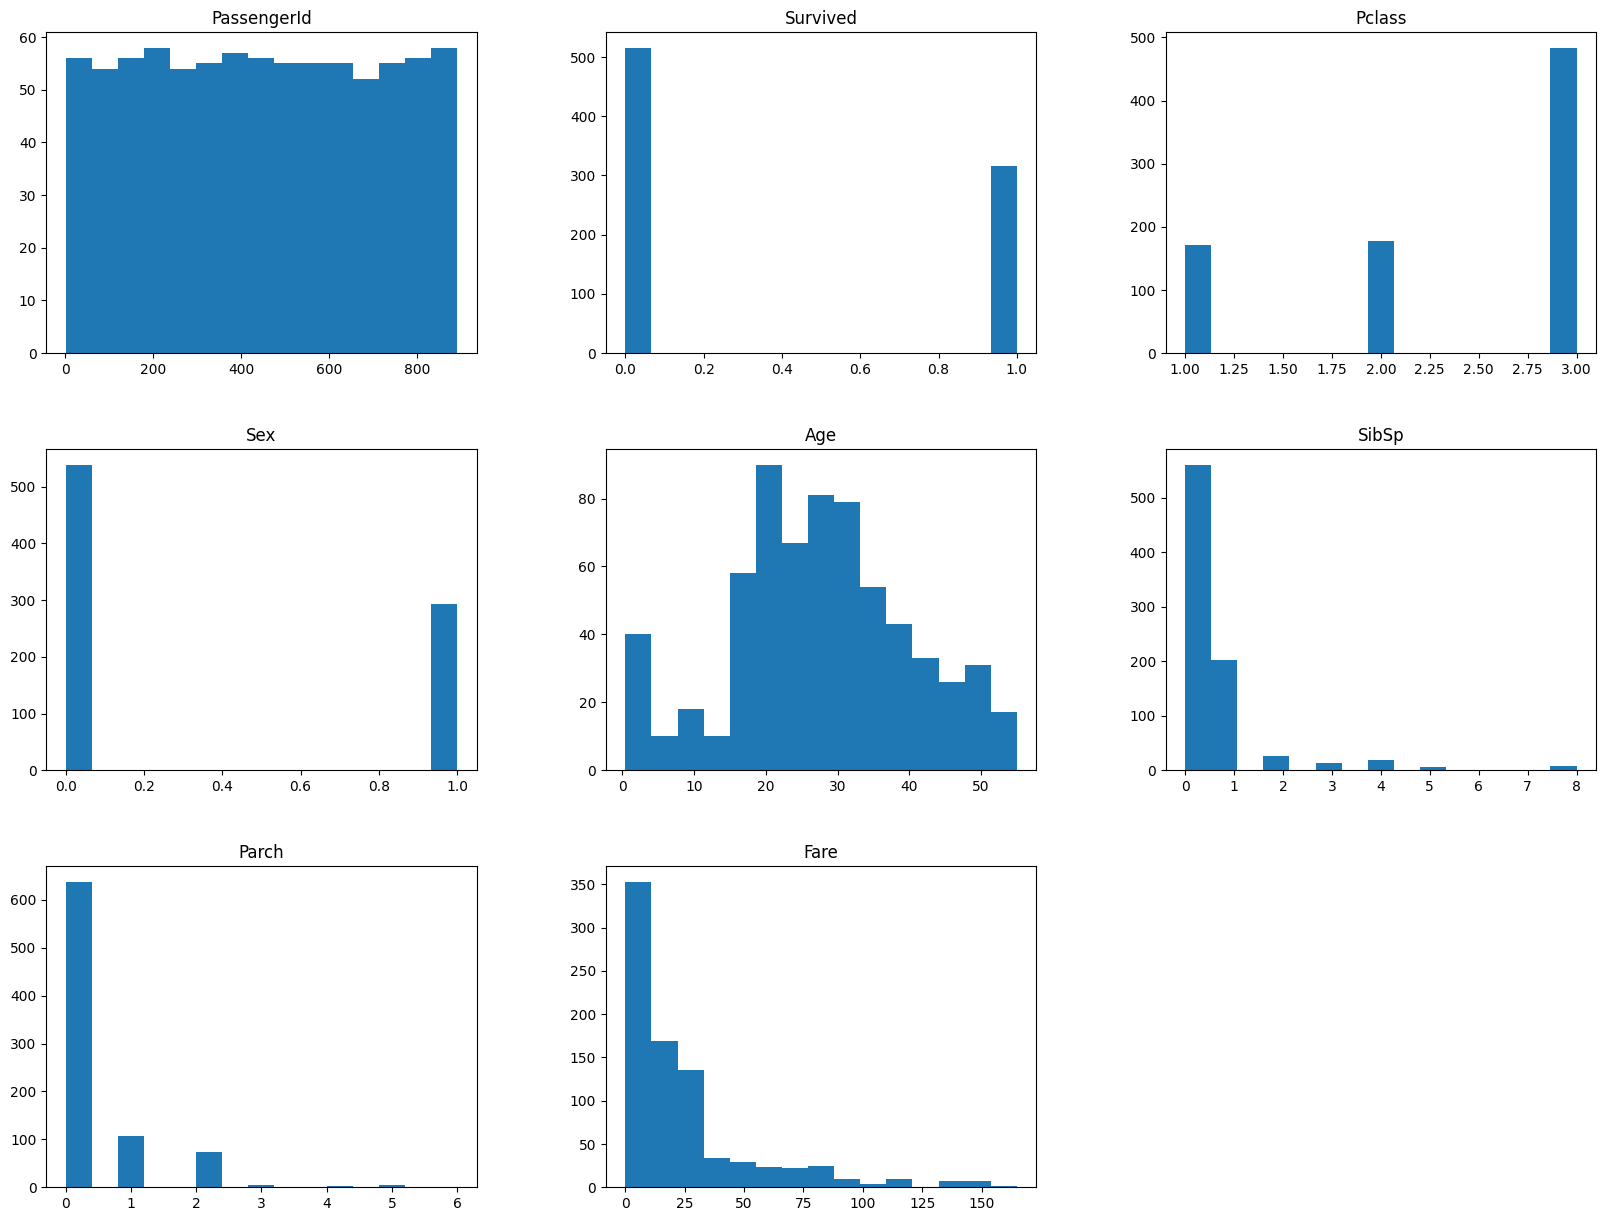

In [18]:
# remover os *outliers* em um novo DataFrame
train_clean = train.copy()
train_clean.drop(train_clean[train_clean.Age > 55].index, axis=0, inplace=True)
train_clean.drop(train_clean[train_clean.Fare > 200].index, axis=0, inplace=True)

print("Registros:\t {}".format(train.shape[0]))
print("Registros:\t {}".format(train_clean.shape[0]))

# plotar o histograma para as variáveis numéricas
train_clean.hist(bins=15, figsize=(20,15), grid=False);

**Tratando dados *nulos***

Identificamos os dados *nulos* nas variáveis `Age`, `Cabin` e `Embarked`, vamos agora preencher a coluna `Age` com o valor '-1', pois transformamos ela em número e iremos usá-la em nosso modelo.

In [19]:
train_clean['Age'] = train_clean['Age'].fillna(-1)

In [20]:
(train_clean.isnull().sum() / train_clean.shape[0]).sort_values(ascending=False)

Cabin          0.800481
Embarked       0.001202
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64